In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('iris.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


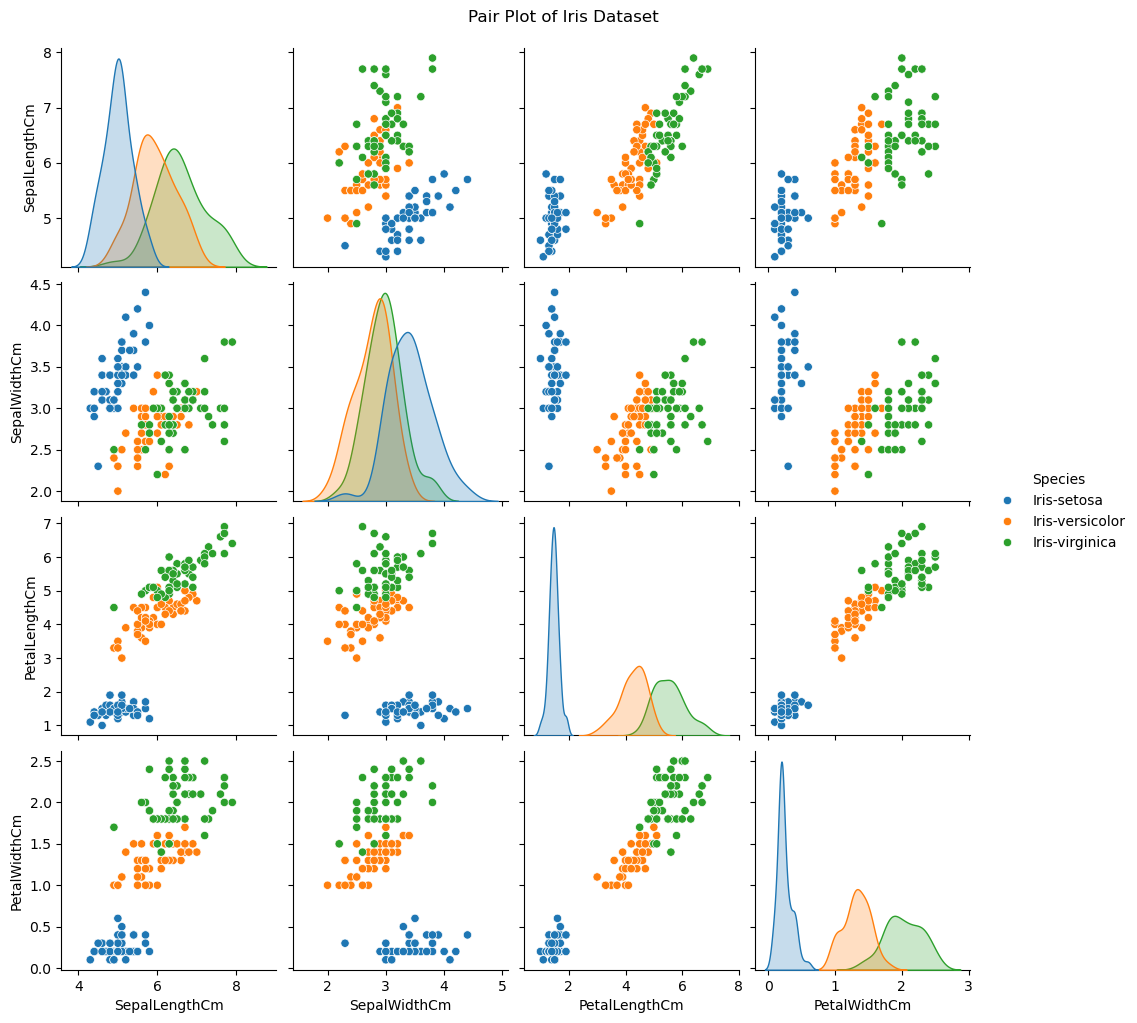

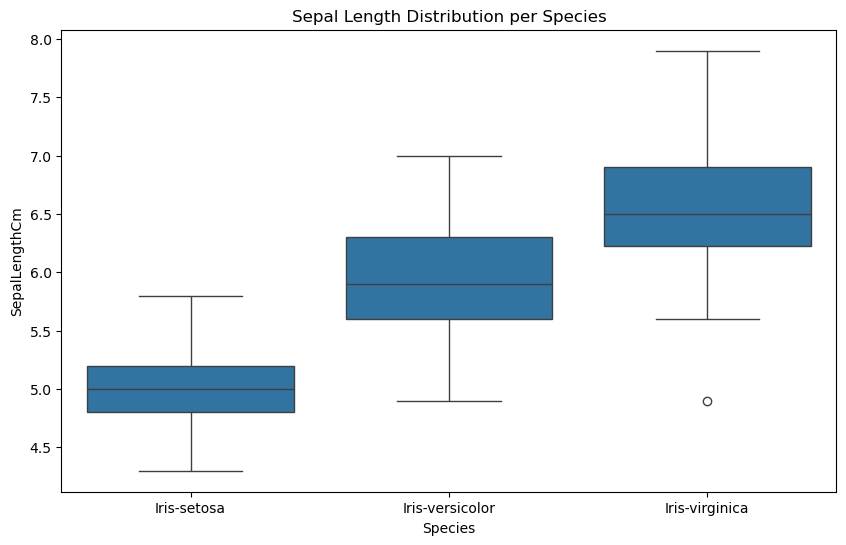

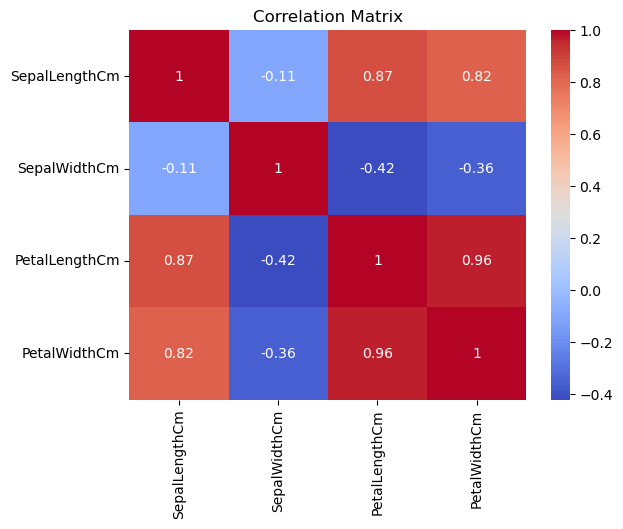

In [5]:
# 1. Data Exploration and Visualization
# Pair plot for visualization
sns.pairplot(df, hue="Species")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

# Additional visualizations
# Boxplot for feature distributions per class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length Distribution per Species')
plt.show()

# Heatmap for correlation (Exclude non-numeric columns explicitly)
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation = numeric_df.corr()  # Calculate correlation matrix on numeric data
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# 2. Data Preprocessing
# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Splitting the dataset into features and labels
X = df.drop(columns='Species')
y = df['Species']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (important for algorithms like KNN, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Missing values in the dataset:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [9]:
# 3. Model Selection and Training
# List of models to try
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Training models and evaluating them using cross-validation
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    results[name] = cv_results
    print(f"\n{name} - Cross-Validation Accuracy: {cv_results.mean():.4f}")


K-Nearest Neighbors - Cross-Validation Accuracy: 0.9333

Decision Tree - Cross-Validation Accuracy: 0.9500

Random Forest - Cross-Validation Accuracy: 0.9500

Support Vector Machine - Cross-Validation Accuracy: 0.9500

Logistic Regression - Cross-Validation Accuracy: 0.9583



Best Model: Logistic Regression - Test Accuracy: 1.0000


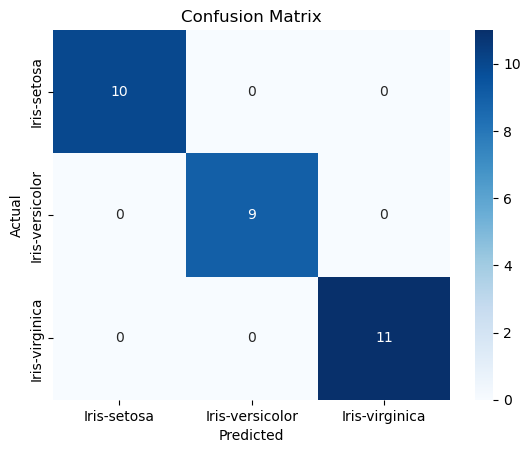


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
# 4. Model Evaluation - Choosing the best model based on cross-validation
best_model_name = max(results, key=lambda x: results[x].mean())
best_model = models[best_model_name]

# Train the best model
best_model.fit(X_train_scaled, y_train)

# Predict using the test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model: {best_model_name} - Test Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [17]:
# 5. Hyperparameter Tuning 
# Example with Random Forest Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)   


Best parameters found by GridSearchCV:
{'max_depth': 10, 'n_estimators': 50}


In [27]:
# 6. Model Interpretation and Insights
# Feature importances (Random Forest & Decision Trees)
print(f"Best Model: {best_model_name}")  # Verify which model was selected as the best

if best_model_name == 'Random Forest':
    # Check if the best model is actually Random Forest
    if isinstance(best_model, RandomForestClassifier):
        # Feature importance calculation
        feature_importances = best_model.feature_importances_
        feature_names = X.columns
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
        
        # Display the feature importance
        print("\nFeature Importances from Random Forest:")
        print(feature_importance_df)
    else:
        print("\nThe best model is not Random Forest.")
else:
    print("\nBest Model is not Random Forest, so feature importance is not available.")


Best Model: Logistic Regression

Best Model is not Random Forest, so feature importance is not available.
